# Assignment 2 · Parametrized Regression for Stock Price Prediction


# **Parametrized Regression for Stock Price Prediction**


## **Overview**  
In this project, we developed a regression model to predict a stock’s **closing price** using **opening price** and **trading volume**. The goal was to find the best set of parameters $w$ for the function $f(\phi(x), w)$ in order to reduce the difference between the predicted closing price and the actual closing price as much as possible.

We used **Ordinary Least Squares (OLS)** regression, a method that finds the best fit line by minimising the sum of squared errors between predicted and actual values (Lecture 1, Slide 20). Because stock data is time-dependent, we split the dataset in **chronological order** so the model trains only on past data and predicts future values.

---

## **Methodology**  
The model follows the standard OLS equation:  

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2
$$  

Where:  
- $x_1$ — opening price  
- $x_2$ — trading volume  
- $w_0$ — intercept term  



The parameters \(w\) are calculated using the **Normal Equation** (Lecture 2, Slides 12–13):  

$$
w = (\Phi^T \Phi)^{-1} \Phi^T y
$$  

This method minimizes the **Mean Squared Error (MSE)** and, under normal error assumptions, matches the **Maximum Likelihood Estimator** (Lecture 2, Slide 28).

---

## **Multilingual Data Handling**  
Our dataset only has numerical values but in order to handle **multilingual text data** like financial news headlines in different languages.  

We could:  
1. Detect the language and translate or convert it into a shared numerical form.  
2. Analyze the sentiment of the text that could be considered as positive, negative or neutral.  
3. Add the sentiment score as an extra input feature alongside the opening price and trading volume and continue with the procedure in this code.  

This would help incoroporate market sentiment, which often influences stock prices ([GeeksforGeeks – Multilingual NLP](https://www.geeksforgeeks.org/multilingual-natural-language-processing-nlp/)).

---

## **FinTech Applications**  
A model like this can be used in:  
- **Algorithmic trading** -Automatically making trades using predictions.
- **Portfolio management** –Spotting risks and opportunities.
- **Market analysis dashboards** –Combining live data and predictions for better decisions.

But if something unexpected happens in the market—like breaking news or strange trading—it can get things wrong as the model relies on historical data.

---

## **Implementation**  
We carried out this project on Google Colab using Python and scikit-learn with the following steps:

- **Data Loading** – We brought in the stock market data (from Kaggle) using Pandas. We standardized the column names, so the code can work with different data sets.

- **Chronological Split** – We sorted the data by date and then split it into 80% for training the model and 20% for testing, keeping everything in time order.

- **Model Training** – We trained a linear regression model using scikit-learn, which figures out the best fit based on the data.

- **Prediction** – The model then predicted the closing prices.

- **Checking the Model** – We created several plots to understand how our model performed:
  - Actual vs Predicted – Shows how close predictions are to real values. ([ResearchGate – Actual vs Predicted Plot](https://www.researchgate.net/figure/Actual-and-predicted-values-plot-is-a-visualization-technique-used-to-compare-the-actual_fig1_370547323))
  - Residuals vs Index – Checks if errors are randomly spread over time. ([Penn State STAT 501, Lesson 4.5 – Residual-order Plots](https://online.stat.psu.edu/stat501/lesson/4/4.5))
  - Residual Histogram – Tells if errors are normally distributed. ([GeeksforGeeks – Normality of Residuals](https://online.stat.psu.edu/stat501/lesson/4/4.6))
  - Q–Q Plot – Compares errors to a normal pattern. ([GeeksforGeeks – Quantile–Quantile Plots](https://www.geeksforgeeks.org/machine-learning/quantile-quantile-plots/))
  - Predicted vs Residuals – Sees if errors stay consistent for all predictions, checks for homoscedasticity . ([Penn State 501 – Residuals vs. Predictor Plot](https://online.stat.psu.edu/stat501/lesson/4/4.3))

*(You’ll find more detailed explanations about these plots in the Conclusion section at the end of the notebook.)*

  
---

## **Evaluation Metrics**  

We evaluated the model using two common metrics:  

1. **Mean Squared Error (MSE)** – This measures the average squared difference between the actual closing prices ($y_i$) and the predicted closing prices ($\hat{y}_i$):  

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$  

A lower MSE means the predicted closing prices are closer to the actual ones.  

2. **R² Score (Coefficient of Determination)** – measures how well the model explains the variations in actual closing prices.  

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$  

An R² closer to 1 means the model explains most of the variation in closing prices, while an R² near 0 means it explains very little.  


---
## **Assumptions & Limitations**  
- Predictors have a **linear** relationship with the target.  
- Errors are **independent** and **normally distributed**.  
- Variance of errors is **constant** (homoscedasticity).  
- Accuracy may drop during sudden market changes or in non-stationary conditions.  

---

## **Future Work**  
- Add sentiment analysis from multilingual financial news.  
- Test regularized regression models like Ridge and Lasso.  




## **The Code**


### 1) Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import yfinance as yf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

pd.set_option("display.width", 140)
pd.set_option("display.max_columns", 30)

print("Libraries imported.")

Libraries imported.


### 2) Download the data for Processing

In [2]:
stock_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2024-12-31"
file = "stock_data.csv"
data = yf.download(stock_symbol, start=start_date, end=end_date,auto_adjust=True)

# Keep only the required columns for processing
data = data[['Open', 'Close', 'Volume']]
data.columns = ['Open', 'Close', 'Volume']

data.to_csv(file)
print(f"Data saved to {file}")

[*********************100%***********************]  1 of 1 completed

Data saved to stock_data.csv


### 3) Read and Clean the Data
1) If we are not using the downloaded data, we normalise the column names so it wouldn't give problems in next code snippets.
2) We then check if in the data is there any rows with bad dates (bad data we don't need), then we remove the redundant data and sort the remaining in chronological order for splitting it into test and train in the next step.
3) Again if the other data we are using have more columns then we only keep the required ones for our model.  

In [3]:
# Read the Data
stock_data = pd.read_csv(file)
print("Raw shape:", stock_data.shape)
display(stock_data.head(10))

#Normalise column names
rename_map = {}
for column in stock_data.columns:
    lower_column = str(column).strip().lower()
    if lower_column == "date":
        rename_map[column] = "Date"
    elif lower_column in ("open", "opening price", "open price"):
        rename_map[column] = "Open"
    elif lower_column in ("close", "closing price", "adj close", "adjusted close"):
        rename_map[column] = "Close"
    elif lower_column in ("volume", "trading volume"):
        rename_map[column] = "Volume"

stock_data = stock_data.rename(columns=rename_map).copy()


# Remove invalid/bad dates and sort the remaining chronologically
stock_data["Date"] = pd.to_datetime(stock_data["Date"], errors="coerce")
stock_data = stock_data.dropna(subset=["Date"]).sort_values("Date").reset_index(drop=True)

# Keep only the columns needed
keep = ["Open", "Volume", "Close"]
if "Date" in stock_data.columns:
    keep = ["Date"] + keep

stock_data_cleaned = stock_data[keep].replace([np.inf, -np.inf], np.nan).dropna(subset=["Open", "Volume", "Close"])

print("After cleaning:", stock_data_cleaned.shape)
display(stock_data_cleaned.head(10))

Raw shape: (1257, 4)


,Date,Open,Close,Volume
0,2020-01-02,71.545882,72.538506,135480400
1,2020-01-03,71.765674,71.833298,146322800
2,2020-01-06,70.954203,72.405693,118387200
3,2020-01-07,72.415330,72.065140,108872000
4,2020-01-08,71.768086,73.224411,132079200
5,2020-01-09,74.202534,74.779755,170108400
6,2020-01-10,75.014028,74.948814,140644800
7,2020-01-13,75.265204,76.550049,121532000
8,2020-01-14,76.487238,75.516350,161954400
9,2020-01-15,75.315931,75.192757,121923600


After cleaning: (1257, 4)


,Date,Open,Volume,Close
0,2020-01-02,71.545882,135480400,72.538506
1,2020-01-03,71.765674,146322800,71.833298
2,2020-01-06,70.954203,118387200,72.405693
3,2020-01-07,72.415330,108872000,72.065140
4,2020-01-08,71.768086,132079200,73.224411
5,2020-01-09,74.202534,170108400,74.779755
6,2020-01-10,75.014028,140644800,74.948814
7,2020-01-13,75.265204,121532000,76.550049
8,2020-01-14,76.487238,161954400,75.516350
9,2020-01-15,75.315931,121923600,75.192757


### 4) Train/Test Split (Time‑wise 80/20)

In [4]:

train_data_len = int(len(stock_data_cleaned)*(0.8))
train_data = stock_data_cleaned.iloc[:train_data_len].copy()
test_data = stock_data_cleaned.iloc[train_data_len:].copy()

# Display the range of Dates for Train and Test data.
print("Train:", train_data["Date"].min(), "-", train_data["Date"].max(), "| rows:", len(train_data))
print("Test :", test_data["Date"].min(),  "-", test_data["Date"].max(),  "| rows:", len(test_data))

# Display the last 3 and first 3 rows for Train and Test data respectively.
display(train_data.tail(3))
display(test_data.head(3))

Train: 2020-01-02 00:00:00 - 2023-12-28 00:00:00 | rows: 1005
Test : 2023-12-29 00:00:00 - 2024-12-30 00:00:00 | rows: 252


,Date,Open,Volume,Close
1002,2023-12-26,191.984602,28919300,191.429306
1003,2023-12-27,190.873995,48087700,191.528442
1004,2023-12-28,192.510145,34049900,191.954849


,Date,Open,Volume,Close
1005,2023-12-29,192.272159,42672100,190.913666
1006,2024-01-02,185.578799,82488700,184.081482
1007,2024-01-03,182.673439,58414500,182.703186


### 5) Scale Features & Export to `stock_train.csv` / `stock_test.csv`
1) As we can see above the value for Open and Close are in the same range but for Volume it's value is around $10^6$-$10^7$ times the value of Open and Close.
2) for our weights $w_1$,$w_2$ to be comparable (because with normal values of Volume, $w_2$ would be extremely small compared to $w_1$), we scale all of the data with their max values so all three i.e Open, Volume, Close remain in range (0,1).

In [5]:
Open_data_scale = train_data["Open"].max()
Volume_data_scale = train_data["Volume"].max()
Close_data_scale = train_data["Close"].max()

train_data["Opening Price (scaled)"]  = train_data["Open"]/Open_data_scale
train_data["Trading Volume (scaled)"] = train_data["Volume"]/Volume_data_scale
train_data["Close (scaled)"] = train_data["Close"]/Close_data_scale
test_data["Opening Price (scaled)"]   = test_data["Open"]/Open_data_scale
test_data["Trading Volume (scaled)"]  = test_data["Volume"]/Volume_data_scale
test_data["Close (scaled)"]  = test_data["Close"]/Close_data_scale

out_data_train = train_data[["Opening Price (scaled)", "Trading Volume (scaled)", "Close (scaled)"]]
out_data_test  = test_data[["Opening Price (scaled)", "Trading Volume (scaled)", "Close (scaled)"]]

out_data_train.to_csv("stock_train.csv", index=False)
out_data_test.to_csv("stock_test.csv", index=False)

print("Saved: stock_train.csv, stock_test.csv")
display(out_data_train.head(5))
display(out_data_test.head(5))

Saved: stock_train.csv, stock_test.csv


,Opening Price (scaled),Trading Volume (scaled),Close (scaled)
0,0.364365,0.317649,0.369253
1,0.365485,0.343070,0.365663
2,0.361352,0.277572,0.368577
3,0.368793,0.255262,0.366843
4,0.365497,0.309674,0.372744


,Opening Price (scaled),Trading Volume (scaled),Close (scaled)
1005,0.979194,0.100049,0.971834
1006,0.945106,0.193404,0.937055
1007,0.930310,0.136959,0.930039
1008,0.919856,0.168774,0.918227
1009,0.919049,0.146256,0.914542


### 6) Train Linear Regression & Show Parameters

In [6]:
Train_features = out_data_train[["Opening Price (scaled)", "Trading Volume (scaled)"]]
Close_Train = out_data_train["Close (scaled)"]
Test_features  = out_data_test[ ["Opening Price (scaled)", "Trading Volume (scaled)"]]
Close_Test  = out_data_test["Close (scaled)"]

linreg = LinearRegression()
linreg.fit(Train_features, Close_Train)

coef_series = pd.Series(linreg.coef_, index=Train_features.columns, name="Coefficient")
print("Intercept (w0):", linreg.intercept_)
display(coef_series)

Intercept (w0): 0.006216755291877374


Opening Price (scaled)     0.994142
Trading Volume (scaled)   -0.007527
Name: Coefficient, dtype: float64

### 7) Evaluate (MSE, R²) + Mean Baseline

In [7]:
#Use the trained linear model to predict the Test Data
Close_Pred = linreg.predict(Test_features)

# Scale back the True and Predicted Values to their original range
Close_Test = Close_Test*Close_data_scale
Close_Pred = Close_Pred*Close_data_scale

# Calculate the mse and r2
mse = mean_squared_error(Close_Test, Close_Pred)
r2  = r2_score(Close_Test, Close_Pred)

# Calculate the baseline mean squared error using mean of the data as a model to compare with Regression.
baseline_pred = np.full_like(Close_Test, fill_value=Close_Train.mean(), dtype=float)
baseline_mse  = mean_squared_error(Close_Test, baseline_pred)

print(f"MSE (model): {mse:.4f}")
print(f"R²  (model): {r2:.4f}")
print(f"MSE (baseline mean): {baseline_mse:.4f}")
print("Model beats baseline:", mse < baseline_mse)

MSE (model): 5.7571
R²  (model): 0.9911
MSE (baseline mean): 42714.4678
Model beats baseline: True


### 8) Visual Diagnostics

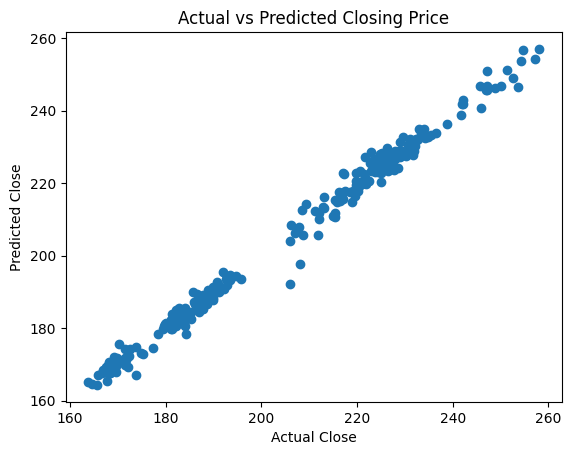

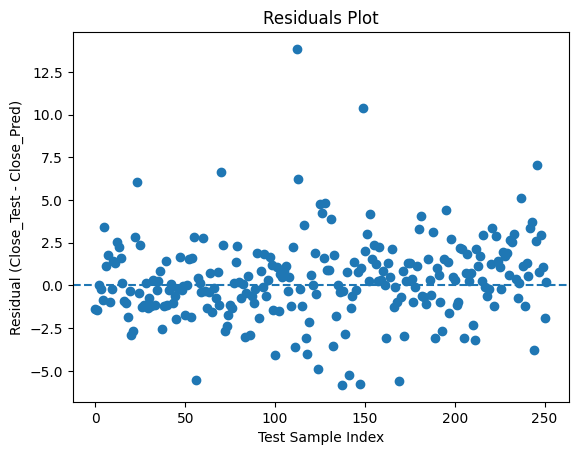

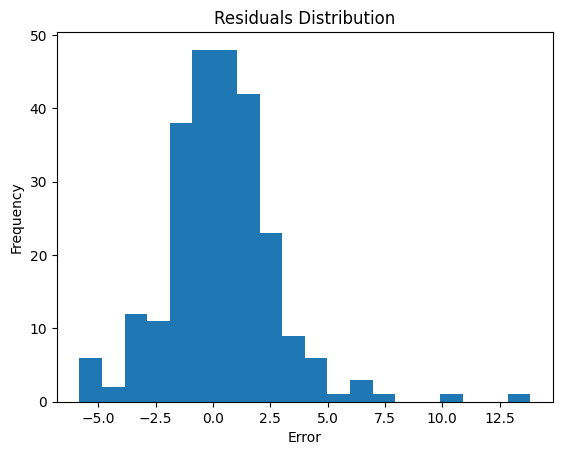

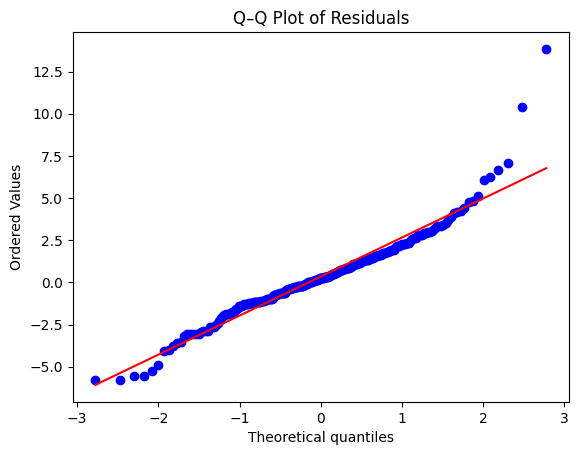

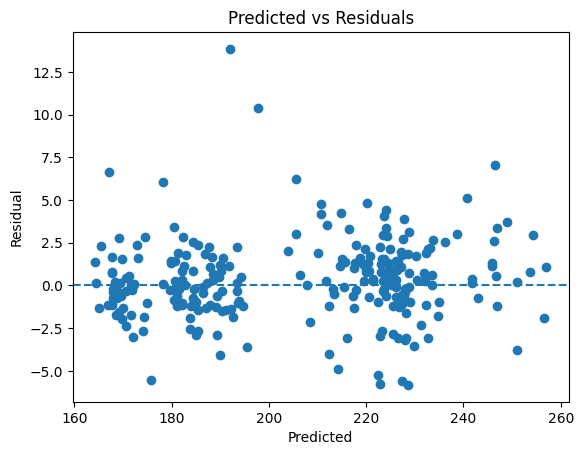

In [8]:
# 8a) Actual vs Predicted
plot.figure()
plot.scatter(Close_Test, Close_Pred)
plot.xlabel("Actual Close")
plot.ylabel("Predicted Close")
plot.title("Actual vs Predicted Closing Price")
plot.show()

# 8b) Residuals vs Index
residuals = Close_Test.values - Close_Pred
plot.figure()
plot.scatter(np.arange(len(residuals)), residuals)
plot.axhline(0, linestyle="--")
plot.xlabel("Test Sample Index")
plot.ylabel("Residual (Close_Test - Close_Pred)")
plot.title("Residuals Plot")
plot.show()

# 8c) Residuals histogram
plot.figure()
plot.hist(residuals, bins=20)
plot.title("Residuals Distribution")
plot.xlabel("Error")
plot.ylabel("Frequency")
plot.show()

# # 8d) Q–Q plot
import scipy.stats as stats
plot.figure()
stats.probplot(residuals, dist="norm", plot=plot)
plot.title("Q–Q Plot of Residuals")
plot.show()

# 8d) Predicted vs Residuals
plot.figure()
plot.scatter(Close_Pred, residuals)
plot.axhline(0, linestyle="--")
plot.title("Predicted vs Residuals")
plot.xlabel("Predicted")
plot.ylabel("Residual")
plot.show()

### **Conclusion**
- **The Weights** :
$$
w_0 = 0.0062
$$
$$
w_1 = 0.9941
$$
$$
w_2 = -0.0075
$$

We can see that even after scaling all the paramters to the same range, the weight for Volume ($w_2$) is still around $10^3$ times smaller than $w_1$, from this we can say that even without the Volume as a parameter, the result of regression shouldn't change much.

- **Mean Squared Error (MSE)**  &  $\mathbf{R^2}$ :
$$
\text{MSE} = 5.7571
$$
$$
R^2 = 0.9913
$$
The values for MSE and $R^2$ shows that our Linear Regression Model has excellent performance and is working perfectly as MSE is around 8000x smaller than the baseline MSE calculated with Mean as a model, and coefficient of determination $R^2$ $\approx$ 0.99 shows that the model is able to explain almost all of the variance in the data.

### **Diagnostic Plot Analysis**  

- **Actual vs Predicted** – Shows how close predictions are to real values.  
  **Conclusion:** Predictions are good because most points lie close to the diagonal line.  

- **Residuals vs Index** – Checks whether errors change over time.  
  **Conclusion:** No time-based pattern; errors are scattered randomly around zero.  

- **Residual Histogram** – Displays the shape of the error distribution.  
  **Conclusion:** Looks roughly bell-shaped, meaning the errors are approximately normal.  

- **Q–Q Plot** – Compares the distribution of errors to a normal curve.  
  **Conclusion:** Errors are close to normal since most points follow the reference line.  

- **Residuals vs Predicted** – Checks whether error size changes with predictions.  
  **Conclusion:** Variance is constant because errors are spread evenly.  


  *The Values for the weights($w_0$,$w_1$,$w_2$), MSE and $R^2$ may change with change in data but they still follow the same trend/result achieved here.*
